In [129]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [130]:
datagen = ImageDataGenerator(rescale=1./255)

In [131]:
train_dir = 'dogsss_train/'

In [132]:
test_dir = 'dogsss_test/'

In [133]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(124,124),
    batch_size=32,
    class_mode='categorical'
)

Found 1230 images belonging to 9 classes.


In [134]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(124,124),
    batch_size=32,
    class_mode='categorical'
)

Found 485 images belonging to 9 classes.


In [135]:
train_generator.class_indices

{'n02086079-Pekinese': 0,
 'n02086240-Shih-Tzu': 1,
 'n02086646-Blenheim_spaniel': 2,
 'n02086910-papillon': 3,
 'n02087046-toy_terrier': 4,
 'n02088094-Afghan_hound': 5,
 'n02088238-basset': 6,
 'n02088364-beagle': 7,
 'n02091134-whippet': 8}

In [136]:
test_generator.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}

In [137]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)), 
    Dropout(0.4),
    Dense(9, activation='softmax')
])

model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 122, 122, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,835,849 (7.00 MB)

 Trainable params: 1,835,849 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [139]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10
)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.1237 - loss: 2.5925
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.1643 - loss: 2.2984
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.1382 - loss: 2.2467
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.1367 - loss: 2.2123
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 152us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.1475 - loss: 2.1919
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [140]:
train_loss, train_accuracy=model.evaluate(train_generator)
print("train loss",train_loss*100)
print("train accuracy",train_accuracy*100)


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.1765 - loss: 2.1734
train loss 217.8201198577881
train accuracy 16.99187010526657


In [141]:
test_loss, test_accuracy=model.evaluate(test_generator)
print("test loss",test_loss*100)
print("test accuracy",test_accuracy*100)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.1533 - loss: 2.2069
test loss 220.81282138824463
test accuracy 15.051546692848206


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[[6.3727428e-38 1.9573030e-05 6.6797395e-18 4.9329256e-11 2.8025862e-15
  9.9947196e-01 2.2738231e-23 4.1646584e-30 5.0854561e-04]]
Predicted class: Afghan_houndBasset
test loss 220.81282138824463
test accuracy 15.051546692848206


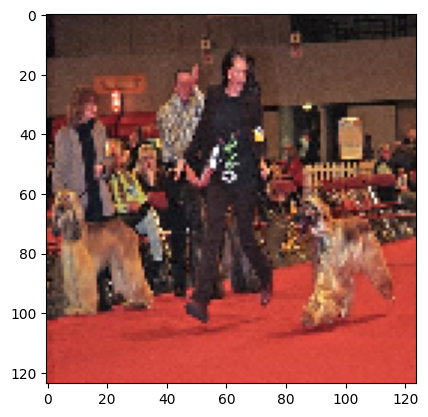

In [142]:
dir = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    ]

image_dir = random.choice(dir) 
image_path = 'dogsss_test/' + image_dir

image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

random_img_path = random.choice(image_files)

plt.imshow(image.load_img(random_img_path,target_size=(124,124)))

img = image.load_img(random_img_path, target_size=(124, 124))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
predictions = model.predict(img_array)
print(predictions)


predicted_index = np.argmax(predictions[0])

class_labels = [
    'Pekinese',
    'Shih-Tzu',
    'Blenheim_spaniel',
    'Papillon',
    'Toy_terrier',
    'Afghan_hound'
    'Basset',
    'Beagle',
    'Whippet',
]

class_label = class_labels[predicted_index]

print("Predicted class:", class_label)

print("test loss",test_loss*100)
print("test accuracy",test_accuracy*100)

